# Introduction to Bayes Models

### Data Science 410

## Introduction

So far, we have mostly work with frequentist statistical methods. Frequentist models make inferences using only data and model assumptions. But, there is another class of statistical models with a long and successful history, Bayesian models. In contrast to the frequentist approach, Bayesian models use **prior information** as well as data and model assumptions to perform inferences.   

Despite the long history, Bayesian models have not been used extensively until recently. This limited use is a result of many reasons. The need to specify the prior information in the form of a **prior distribution** has proved a formidable intellectual obstacle and is often cited as a reason for not using Bayesian methods. Further, modern Bayesian methods are often computationally intensive and have become practical only in the past few decades.        

<img src="img/Sun.png" alt="Drawing" style="width:350px; height:450px"/>
<center>A Bayesian would win this bet</center>


## Brief history

A restricted version of Bayes Theorem was proposed by Rev.Thomas Bayes (1702-1761). Bayes Theorem, was published posthumously by his friend Richard Price. Bayes' interest was in probabilities of gambling games. He was also a supporter of Isac Newton's new theory of calculus, with his publication, *An Introduction to the Doctrine of Fluxions, and a Defence of the Mathematicians Against the Objections of the Author of The Analyst*.

![](img/ThomasBayes.gif)

Pierre-Simon Laplace published a version of Bayes Theorem, similar to its modern form, in his Essai philosophique sur les probabilités 1814. Laplace applied Bayesian methods to problems in celestial mechanics. These problems had great practical importance in the late 18th and early 19th centuries for the safe navigation of ships. 
 
![](img/Laplace.jpg)

 ### Early 20th Century History

The geophysicist and mathematician Harold Jefferys extensively used Bayes' methods. His 1939 book, *The Theory of Probability* was in deliberate opposition to Fisher's methods using p-values. The publication of this book set off a feud between Jefferys and Fisher which lasted until the death of both men in the 1970s. The feud resulted in Bayesian methods rarely being taught or used in scientific publications. Thus, the development and use of Bayesian was limited for a long period of time.   

<img src="img/JeffreysProbability.jpg" alt="Drawing" style="width:225px; height:300px"/>
<center>Jefferys' seminal 1939 book</center>

Despite the philosophical squabbles, Bayesian methods endured and showed an increasing number of success stories. Pragmatists continued to use both approaches. A number of success during the Second World War, with the philosophical battles raging, included:

- Bayesian models were used to improve artillery accuracy in both world wars. In particular the Soviet statistician Kolmagorov used Bayesian methods to greatly improve artillery accuracy. 
- Bayesian models were used by Alan Turing to break German codes.
- Bernard Koopman, working for the British Royal Navy, improved the ability to locate U-boats using directional data from intercepted radio transmissions. 

### Late 20th Century History  

Starting in the second half of the 20th century the convergence of greater computing power and general acceptance lead to the following notable advances in computational Bayesian methods. The following publications are notable milestones in the advancement of Bayesian methods:

- Statistical sampling using Monte Carlo methods; Stanislaw Ulam, John von Neuman; 1946, 1947
- MCMC, or Markov Chain Monte Carlo; Metropolis et al. (1953) Journal of Chemical Physics
- Monte Carlo sampling methods using Markov chains and their application, Hastings (1970)
- Stochastic relaxation, Gibbs distributions and the Bayesian restoration of images, Geman and Geman (1984) 
- Hamiltonian MCMC, Duane, Kennedy, Pendleton, and Roweth (1987)
- Sampling-based approaches to calculating marginal densities, Gelfand and Smith (1990)

### 21st Century  

In the 21st Century Bayesian models are in daily routine use. These applications range across the scope of statistical model applications. A few examples include medical research, natural language understanding, and web search.  One of the more interesting applications is in management of [search and rescue operations](https://sinews.siam.org/Details-Page/bayesian-search-for-missing-aircraft-ships-and-people). Bayesian models have found uses in [legal judgements](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4934658/) when faced with diverse and uncertain evidence.  

## Baysian vs. Frequentist Views

The battle between Fisher, Jefferys and their protégés continued for most of the 20th century. This battle was bitter and often personal. The core of these argument were:

- Fisher argued that the selection of a Bayesian prior distribution was purely subjective, allowing one to achieve any answer desired.
- Jefferys argued that all knowledge is in fact subjective, and that choosing a cut-off value or confidence interval was subjective in any event.

With greater computational power and general acceptance, Bayes methods are now widely used. Among pragmatists, the common belief today is that some problems are better handled by frequentist methods and some with Bayesian methods. Models that fall between these extremes are also in common use.  

Let's summarize the differences between the Bayesian and frequentist views. 

- The goal of Bayesian methods computation of a **posterior distribution**. Bayesian methods use **prior distributions** combined with **evidence** to compute the posterior distribution. 
- Frequentists do not quantify anything about the parameters, using p-values and confidence intervals to express the properties of parameters given the data.

Recalling that both views are useful, we can contrast these methods with a chart.

<img src="img/FrequentistBayes.jpg" alt="Drawing" style="width:500px; height:325px"/>
<center>Comparison of Bayesian and frequentist models</center>


![](img/.jpg)

## References

There are numerous books and articles on Bayesian data analysis. Further, there is a growing number of powerful software packages that can be used for Bayesian data analysis.

### Some introductory texts

These two books provide a broad and readable introduction to Bayesian data analysis... well, sort of. Both books contain extensive examples using R and specialized Bayes packages.

<img src="img/StatisticalRethinking.jpg" alt="Drawing" style="width:200px; height:275px"/>

<img src="img/DoingBaysianDataAnalysis.jpg" alt="Drawing" style="width:200px; height:275px"/>


### Modeling reference

This book contains a comprehensive treatment of applying Bayesian models. The level of treatments in intermediate. The examples are from the social sciences, but the methods can be applied more widely. The examples use R and specialized Bayes packages. 

<img src="img/BayesRegression.jpg" alt="Drawing" style="width:200px; height:275px"/>

### Theory 

This book contains a comprehensive overview of the modern theory of Bayesian models. The book is at an advanced level. Only theory is addressed, which only very limited R code examples.  

<img src="img/BaysianDataAnalysis.jpg" alt="Drawing" style="width:200px; height:275px"/>

### Software

Most Bayes software packages use efficient Markov chain Monte Carlo (MCMC) methods. The most widely used of these is [Stan](https://mc-stan.org/), named for mathematician Stanislaw Ulam. Stan also includes variational approximation methods. A powerful and somewhat more user friendly Python package is [PyMC3](https://docs.pymc.io/). 

## Bayes Theorem and Conditional Probability

As you might guess from the name, Bayesian methods are built upon **Bayes' Theorem** or **Bayes' Rule**, a fundamental relationship for **conditional probability**.


## Conditional probability

Let's briefly review **conditional probability**. Conditional probability is the probability that event A occurs given that event B has occurred. Consider the example of events in a space S with subspaces A and B, shown below. 

<img src="img/Prob1.png" alt="Drawing" style="width:300px; height:200px"/>

We can write a conditional probability relationship between the subsets as follows. We write the conditional probability of A given B:

$$P(A|B)$$

Let's try to find the relationship between conditional probability and the intersection between the sets, $P(A \cap B)$. To find this probability notice that it is the product of two probabilities:  
1. $P(B)$ since B must be true to be in this intersection. 
2. $P(A|B)$ since A must also occur when B is occurring.

We can now write:

$$P(A \cap B) = P(A|B) P(B)$$

Rearranging terms we get the following for our example: 

\begin{align}
P(A|B) &= \frac{P(A \cap B)}{P(B)} \\
& = \frac{\frac{2}{10}}{\frac{4}{10}} = \frac{2}{4} = \frac{1}{2}
\end{align}




### Bayes Theorem

As has already been stated, Bayes' Theorem is fundamental to Bayesian data analysis. To get started, let's go through a simple derivation of Bayes, theorem. From the previous section we have:

$$P(A|B) P(B) = P(A \cap B)$$

Using the same approach, we can also write: 

$$P(B|A) P(A) = P(A \cap B)$$

Eliminating $P(A \cap B):$

$$ P(B)P(A|B) = P(A)P(B|A)$$

Or, 

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Which is Bayes' Theorem!

But, how can you interpret Bayes' Theorem in a way that is useful for data analysis? 

$$Posterior\ Distribution = \frac{Likelihood \bullet Prior\ Distribution}{Distribution\ of\ Data} $$

In general, we are interested in estimating model parameters. In this case, we can think of Bayes' theorem as follows:   

$$𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠│𝑑𝑎𝑡𝑎) = \frac{𝑃(𝑑𝑎𝑡𝑎|𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠)\ 𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠)}{P(data)} $$

### Example, probabilities of eye and hair color

A sample population has the following probabilities of eye and hair color combinations. Execute thhe code to see the chart of conditional probabilities.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
import scipy
import itertools

%matplotlib inline

In [2]:
eye_hair = pandas.DataFrame({
    'black': [0.11, 0.03, 0.03, 0.01], 
    'brunette': [0.2, 0.14, 0.09, 0.05],
    'red': [0.04, 0.03, 0.02, 0.02],
    'blond': [0.01, 0.16, 0.02, 0.03],
}, index=['brown', 'blue', 'hazel', 'green'])

eye_hair

,black,brunette,red,blond
brown,0.11,0.20,0.04,0.01
blue,0.03,0.14,0.03,0.16
hazel,0.03,0.09,0.02,0.02
green,0.01,0.05,0.02,0.03


Note: here we're using a string index for eye color rather than a numeric zero-based index. So to access a given (eye, hair) color value, index the dataframe like so:

In [3]:
eye_hair.loc['hazel', 'red']

0.02

The figure in the table above are the **conditional probabilities**. Note that in the case: 

$$P(hair|eye) = P(eye|hair)$$ 

Given these conditional probabilities, it is easy to compute the marginal probabilities by summing the probabilities in the rows and columns. The **Marginal probability** is the probability along one variable (one margin) of the distribution. Computing the marginal distribution is sometimes referred to as **summing out** the conditioning variable. For example, one can compute $P(Red)$ or $P(Green)$. by summing out all the conditioning variables. Like all probability distributions, the probabilities of a marginal distribution must sum to 1.0. 

The code in the cell below computes the marginal probabilities of eye color and appends the results to the data frame. Execute this code and examine the result.

In [4]:
## Compute the marginal distribution of each eye color
eye_hair['marginal_eye'] = eye_hair.sum(axis=1)
eye_hair

,black,brunette,red,blond,marginal_eye
brown,0.11,0.20,0.04,0.01,0.36
blue,0.03,0.14,0.03,0.16,0.36
hazel,0.03,0.09,0.02,0.02,0.16
green,0.01,0.05,0.02,0.03,0.11


Now, execute the code in the cell below to compute the marginal distribution of hair color and append it to the data frame.

In [5]:
eye_hair.loc['marginal_hair'] = eye_hair.sum(axis=0)
eye_hair

,black,brunette,red,blond,marginal_eye
brown,0.11,0.20,0.04,0.01,0.36
blue,0.03,0.14,0.03,0.16,0.36
hazel,0.03,0.09,0.02,0.02,0.16
green,0.01,0.05,0.02,0.03,0.11
marginal_hair,0.18,0.48,0.11,0.22,0.99


What inferences can you make from these marginal distributions? What is the most common eye color? What is the least common hair color?

**Your Turn:** Use Bayes Theorm to compute the probability of each eye color given that the subject has blue eyes; $P(Hair\ Color|Blue\ Eyes)$. Hint, this is a bit tricky since $P(hair\ color) = 1$ across all colors. 

In [6]:
eye_hair.loc['blue', 'blond']/eye_hair.loc['blue', 'marginal_eye']

0.4444444444444445

In [7]:
eye_hair.loc['blue', 'blond']/eye_hair.loc['marginal_hair', 'blond']

0.7272727272727273

## Applying Bayes Theorem

We need a formulation of Bayes Theorem which is tractable for computational problems. Specifically, we don't want to be stuck summing all of the possibilities to compute the denominator, $P(B)$. In fact, in many cases, computing this denominator can be intractable.  

We can start by examining some fun facts about conditional probabilities. 

$$
𝑃(𝐵 \cap A) = 𝑃(𝐵|𝐴)𝑃(𝐴) \\
And \\
𝑃(𝐵)=𝑃(𝐵 \cap 𝐴)+𝑃(𝐵 \cap \bar{𝐴}) \\
Then \\
𝑃(𝐵)=𝑃(𝐵|𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴}) \\
where \\
\bar{A} = Not\ A
$$

We can now rewrite Bayes Theorm:

$$ P(A|B) = \frac{P(A)P(B|A)}{𝑃(𝐵│𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴})} \\ $$

In summary, to compute the denominator we need to sum all the cases in the subset A and all the cases not in the subset A. This is a bit of a mess. But fortunately, we don't always need the denominator. We can rewrite Bayes Theorem as:

$$𝑃(𝐴│𝐵)=𝑘∙𝑃(𝐵|𝐴)𝑃(𝐴)$$

Ignoring the normalization constant $k$, we get:

$$𝑃(𝐴│𝐵) \propto 𝑃(𝐵|𝐴)𝑃(𝐴)$$

### Applying the simplified relationship Bayes Theorem

How to we interpret the relationship shown above? We can do this as follows:

$$Posterior\ Distribution \propto Likelihood \bullet Prior\ Distribution \\
Or\\
𝑃( 𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠 │ 𝑑𝑎𝑡𝑎 ) \propto 𝑃( 𝑑𝑎𝑡𝑎 | 𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠 )𝑃( 𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠 ) $$

These relationships can apply to the observed data distributions. Most typically, to parameters in a model, including partial slopes, intercept, error distributions, lasso constant, etc. 



## Creating Bayes models

The goal of a Bayesian model is to find the posterior distribution of parameters. The general steps are as follows:

1. Identify data relevant to the research question. Unlike for frequentist models, data need not be collected in advance.   
2. Define a descriptive model for the data. For example, a linear model formula might be used for some problems.
3. Specify a prior distribution of the model parameters. For example, you might believe that the parameters of the linear model should be Normally distributed as $N(\theta,\sigma^2)$.
4. Use the Bayesian inference formula (above) to compute posterior distribution of the model parameters. IF there is no data as yet, the posterior distribution is the same as the prior distribution. 
5. Update if more data is observed. This is key! The posterior of a Bayesian model naturally updates as more data is added, a form of learning.
6. Optionally, simulate data values from realizations of the posterior distribution of the parameters.


### How can you choose a prior?

The choice of the prior is a serious problem when performing Bayesian analysis. In fact, the need to choose a prior has often been cited as a reason why Bayesian models are impractical. A general consideration is that a prior must be convincing to a **skeptical audience**. 

There are a number of ways one can come up with a good prior distribution. Some possible approaches include:

- Using prior empirical information about the problem. This might include come from 
- Apply domain knowledge to determine a reasonable distribution. For example, viable range of parameter values could be computed from physical principles. 
- If there is poor prior knowledge for the problem use less informative prior. One possibility is a Uniform distribution. But **watch out**, a uniform prior is informative, since you must set the limits on range of values! There can be other options for uninformative distributions, such as the Jefferys' prior. 
 
One analytically and computationally simple choice for a prior distribution family is a **conjugate prior**. When a likelihood is multiplied by a conjugate prior the distribution of the posterior is the same as the likelihood. Most named distributions have conjugates. A few commonly used examples are shown in the table below:

Likelihood | Conjugate
---|---
Binomial|Beta
Bernoulli|Beta
Poisson|Gamma
Categorical|Dirichlet
Normal| Normal, Inverse Gamma

However, there are many practical cases where a conjugate prior is not used. With modern computational methods, a conjugate distribution is not required. 

## First Example

With a bit of theory in mind, let's pull things together with an example. Let's say we are interested in analyzing distracted drivers. We randomly sample the behavior of 10 drivers at an intersection and determine if they exhibit distracted driving or not. The data are binomially distributed, a driver is distracted or not. In the example we will:

1. Select the Binomial distribution for the likelihood.
2. Choose a Uninformative distribution as the prior.   
3. Using the data sample, compute the likelihood.
4. Compute the posterior distribution of distracted driving. 
5. Try another prior distribution and repeat step 4. Specifically use the conjugate prior, the Beta distribution with parameters $\alpha$ and $\beta$.
5. Add more data to our data set to updated the posterior distribution.

The likelihood of the data and the posterior distribution are binomially distributed. The Binomial distribution has one parameter we need to estimate, $p$, the probability. We can write this formally for $k$ successes in $N$ trials:

$$ P(k) = \binom{N}{k} \cdot p^k(1-p)^{N-k}$$

The code in the cells below creates a simple data set of distracted and not-distracted drivers and computes some simple summary statistics. Execute this code. 

In [8]:
drivers = ['yes','no','yes','no','no','yes','no','no','no','yes']
distracted = [1 if x is 'yes' else 0 for x in drivers]
distracted

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]

In [9]:
N = len(distracted)  # sample size
n_distracted = sum(distracted)  # number of distracted drivers
n_not = N - n_distracted # number not distracted
print('Distracted drivers = %d \nAttentive drivers = %d'
    '\nProbability of distracted driving = %.1f' 
      % (n_distracted, n_not, n_distracted / (n_distracted + n_not)))

Distracted drivers = 4 
Attentive drivers = 6
Probability of distracted driving = 0.4


Let's test a prior distribution for our one model parameter $p$, $P(p)$. We don't know a lot about these drivers at this point, so we will start with a Uniform distribution. To be completely uninformative, we will set the limits of our prior for $p$ as $\{0,1\}$. 

The code in the cell below computes and plots the uniform prior distribution. Execute this code and examine the results. 

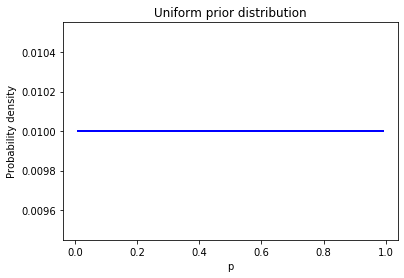

In [10]:
N = 100
p = numpy.linspace(.01, .99, num=N)
pp = [1./N] * N
plt.plot(p, pp, linewidth=2, color='blue')
plt.xlabel('p')
plt.ylabel('Probability density')
_=plt.title('Uniform prior distribution')

Next, we need to compute the likelihood. The likelihood is the probability of the data given the parameter, $P(X|p)$, using the Binomial distribution. The code in the cell below computes and plots the Binomial likelihood for the distracted driver data. This calculation is performed for each value of $p$ we are sampling. Execute this code and examine the results.

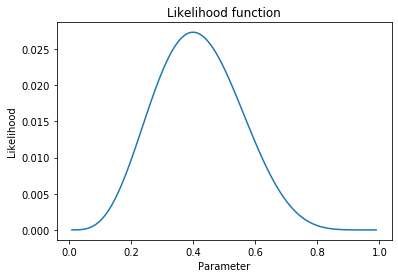

In [11]:
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)

l = likelihood(p, distracted)
plt.plot(p, l)
plt.title('Likelihood function')
plt.xlabel('Parameter')
_=plt.ylabel('Likelihood')

Notice the following about the likelihood:
1. The maximum is at $p=0.4$, the actual parameter value.
2. The likelihood of high and low parameter values is nearly 0. 

Now that we have a prior and a likelihood we are in a position to compute the posterior distribution of the parameter $p$, $P(p|X)$. The code in the cell below computes and plots the posterior, given the prior and likelihood.

> **Warning!** The computational methods used in this notebook are simplified for the purpose of illustration. For real-world problems, computationally efficient code must be used!


In [12]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

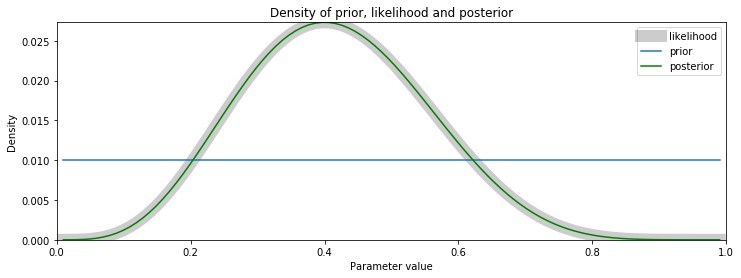

In [13]:
def plot_post(prior, like, post, x):
    maxy = max(max(prior), max(like), max(post))
    plt.figure(figsize=(12, 4))
    plt.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    plt.plot(x, prior, label='prior')
    plt.plot(x, post, label='posterior', color='green')
    plt.ylim(0, maxy)
    plt.xlim(0, 1)
    plt.title('Density of prior, likelihood and posterior')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.legend()
    
post = posterior(pp, l)
plot_post(pp, l, post, p)

In [14]:
print('Maximum of the prior density = %.3f' % max(pp))
print('Maximum likelihood = %.3f' % float(float(numpy.argmax(l))/100.0 + 0.01))
print('MAP = %.3f' % float(float(numpy.argmax(post))/100.0 + 0.01))

Maximum of the prior density = 0.010
Maximum likelihood = 0.400
MAP = 0.400


Notice that with Uniform prior distribution, the posterior is just the likelihood. This is an important observation. The key point is that the frequentist probabilities are identical to the Bayesian posterior distribution given a Uniform prior.  

### Another prior

Let's try another prior distribution. We will chose the **conjugate prior** of the Binomial distribution which is the Beta distribution. Formally, we can write the Beta distribution:

$$Beta(p |a, b) = \kappa x^{a-1}(1 - x)^{b-1} \\
where,\ \kappa = normalization\ constant$$

The Beta distribution is define on the interval $0 \le Beta(p|a,b) \le 1$. The Beta distribution has two parameters, $a$ and $b$, which determine the shape. To get a feel for the Beta distribution, execute the code in the cell below which computes 25 examples on a 5x5 grid. 

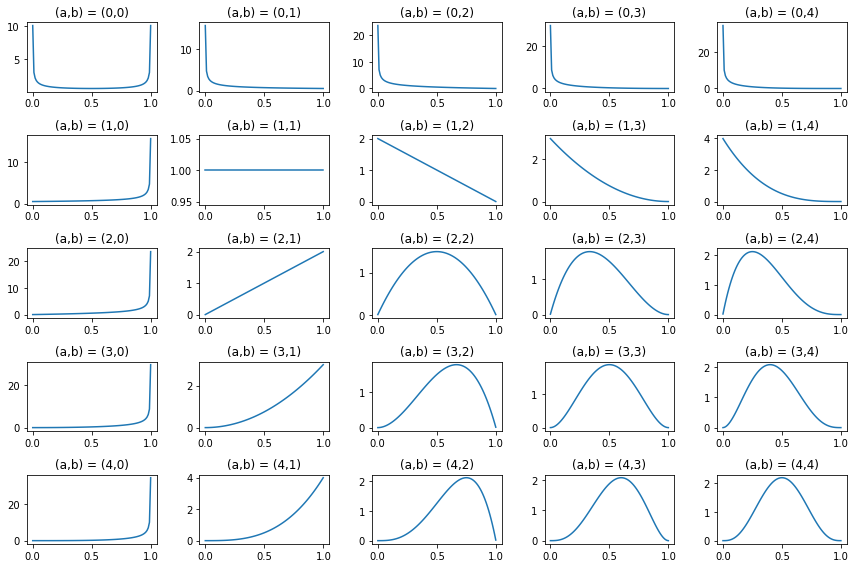

In [15]:
plt.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = numpy.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    plt.subplot(len(alpha), len(beta), i+1)
    plt.plot(x, scipy.stats.beta.pdf(x, a, b))
    plt.title('(a,b) = (%d,%d)' % (a,b))
plt.tight_layout()    

You can see from the plots above, that the Beta distribution can take on quite a range of shapes, depending on the parameters. Generally if $a \gt b$ the distribution skews to the rights, if $a \lt b$ to the left, and symmetric if $ a = b$. Notice also that $Beta(1,1)$ is the Uniform distribution. 

We still do not know a lot about the behavior of drivers, so we will pick a rather vague or broad Beta distribution as our prior. The code in the cell below uses a symmetric prior with $a = 2$ and $b = 2$. This prior is fairly vague and assumes that the maximum value of $p=0.5$. Execute this code and examine the result. 

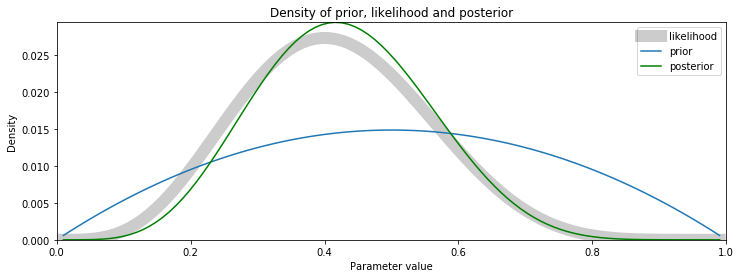

In [19]:
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return

pp = beta_prior(p, 2, 2)
post = posterior(pp, l)
plot_post(pp, l, post, p)

In [20]:
print('Maximum of the prior density = %.3f' % float(float(numpy.argmax(pp))/100.0 + 0.01))
print('Maximum likelihood = %.3f' % float(float(numpy.argmax(l))/100.0 + 0.06))
print('MAP = %.3f' % float(float(numpy.argmax(post))/100.0 + 0.06))

Maximum of the prior density = 0.500
Maximum likelihood = 0.450
MAP = 0.470


Notice that the mode of the posterior is close to the mode of the likelihood, but has shifted toward the mode of the prior. We call this tendency of Bayesian posteriors to shift toward the prior the **shrinkage property**. The tendency of the maximum likelihood point of the posterior is said to shrink toward the maximum likelihood point of the prior. 

We can now see that the posterior probability of distracted driving has a rather wide spread. How can we get a more definitive understanding of the probability of distracted driving?

### Adding data to the Bayesian model

Let's say that we observe some more drivers to gather more data on distracted driving. Additional data will narrow the spread of the posterior distribution. Further, as data is added to a Bayesian model, the posterior moves toward the likelihood. This property has several important implications:

- The prior matters less as more data is added to a Bayesian model.
- Adding data reduces shrinkage.
- The inferences from Bayesian and frequentist models tend to converge as data set size grows and the posterior approaches the likelihood.

The use of a prior can mean that Bayesian methods provide useful inferences with minimal data. **But, be careful!** For large scale problems with large numbers of parameters you may need enormous data sets to see the convergence in behavior. 

The code in the cell below adds another 10 observations to our data set. Execute this code and examine the results. How do the likelihood and posterior distributions compare with the case with only 10 data points.

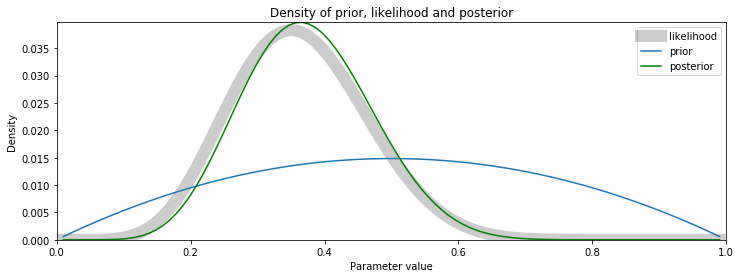

In [21]:
new_drivers = ['no','yes','no','no','no',
          'yes','no','yes','no','no']  # Some new data
new_distracted = [1 if x is 'yes' else 0 for x in new_drivers]

l = likelihood(p, distracted + new_distracted)
post = posterior(pp, l)
plot_post(pp, l, post, p)

## Credible Intervals

A **credible interval** is an interval on the Bayesian posterior distribution. The credible interval is sometime called the highest density interval (HDI), or highest posterior density interval (HPI). As an example, the 90% credible interval encompasses the 90% of the posterior distribution with the highest probability density.  

The credible interval is the Bayesian analog of the frequentist confidence interval. However, these two measures are conceptually different. The confidence interval is chosen on the distribution of a test statistic, whereas the credible interval is computed on the posterior distribution of the parameter. For symmetric distributions the credible interval can be numerically the same as the confidence interval. However, in the general case, these two quantities can be quite different.  

The code in the cell below, plots the posterior distribution of the parameter of the binomial distribution parameter  pp . An approximation of the 95% credible interval, or HDI, is also computed and displayed. Execute this code and examine the result. 


> **Warning!** This code assumes a symmetric prior distribution, so will not work in the general case. 

The 0.950 credible interval is 0.198 to 0.574


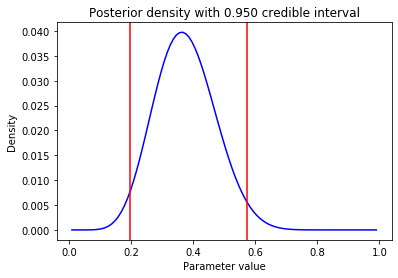

In [22]:
num_samples = 100000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = numpy.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    plt.title('Posterior density with %.3f credible interval' % interval)
    plt.plot(p, post, color='blue')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.axvline(x=ci[0], color='red')
    plt.axvline(x=ci[1], color='red')

    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, ci[0], ci[1]))
    
plot_ci(p, post, num_samples, lower_q, upper_q)

### Simulating from the  posterior distribution: forecasting

So far, we have computed the posterior distribution of the probability parameter $p$. But what about the distribution of distracted drivers? We can compute this distribution by simulating from the posterior distribution of $p$. 

The code in the cell below simulates and plots the distribution of distracted drivers. Run this code and examine the results. 

Text(0, 0.5, 'Probability')

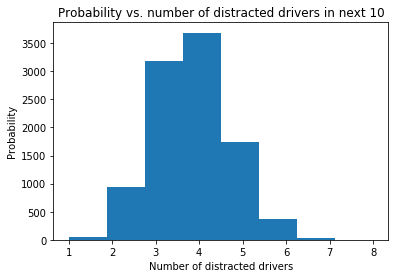

In [23]:
num_cars = 10
num_samples = 10000

counts = (10 * numpy.random.choice(p, size=num_samples, replace=True, p=post)).round()
plt.hist(counts, bins=int(max(counts)))
plt.title('Probability vs. number of distracted drivers in next %d' % num_cars)
plt.xlabel('Number of distracted drivers')
plt.ylabel('Probability')

## Comparing Bayesian models

How can we use Bayesian models to compare two distributions? It turns out that we can compare Bayesian models in several ways. In this lesson, we will compute and compare confidence intervals of the posterior distribution of a model parameter. 

For this example, we will compare the posterior distribution of the heights of sons to the heights of the mothers in the Galton Family dataset. As a first step, we will compute and evaluate Bayesian models for the mean heights using a subset of just 25 observations. 

The code in the cell below sub-samples the Galton family data and then plots histogram of the heights of sons and mothers. Execute this code and examine the results.

In [24]:
families = pandas.read_csv('GaltonFamilies.csv', index_col=0)
families.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,1,78.5,67.0,75.43,4,1,male,73.2
2,1,78.5,67.0,75.43,4,2,female,69.2
3,1,78.5,67.0,75.43,4,3,female,69.0
4,1,78.5,67.0,75.43,4,4,female,69.0
5,2,75.5,66.5,73.66,4,1,male,73.5


Mean of heights: 67.3


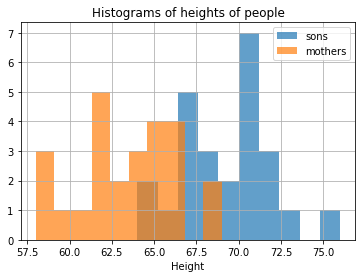

In [25]:
num_samples = 25
male = families[families.gender == 'male'].sample(n=num_samples)

plt.title('Histograms of heights of people')
male.childHeight.hist(label='sons', bins=10, alpha=.7)
male.mother.hist(label='mothers', bins=10, alpha=.7)
plt.xlabel('Height')
plt.legend()

mean_height = numpy.concatenate([male.mother, male.father, male.childHeight,]).mean()
print('Mean of heights: %.1f' % mean_height)

To perform this analysis, we need to select a prior distribution and compute the likelihood. 

First, we will address the likelihood. For these data, we will use a Normal likelihood. For a sample $X = {x_1, x_2, \ldots, x_n}$, we can write the likelihood as:

$$
P(X | u, \sigma) = \bigg(\frac{1}{2 \pi \sigma^2} \bigg)^{\frac{n}{2}} exp \Bigg[ -\frac{1}{2 \sigma^2}  \Bigg( \sum_{i = 1}^n (x_i - \bar{x})^2 + n(\bar{x} - \mu)^2 \Bigg) \Bigg] 
$$
Ignoring constants and normalization:
$$
P(X | u, \sigma) \propto exp \bigg( -\frac{n(\bar{x} - \mu)^2}{2 \sigma^2} \bigg) 
$$

To simplify the computations here, we will only estimate the posterior distribution of the mean. We will use a fixed empirical estimate of the standard deviation. A more complete analysis will also estimate the posterior distribution of the standard deviation.

Mean = 69.196, Standard deviation = 2.630


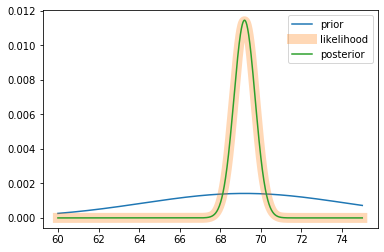

In [26]:
N = 1000
p = numpy.linspace(60, 75, num=N)

pp = scipy.stats.norm.pdf(p, loc=male.childHeight.mean(), scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_son = comp_like(p, male.childHeight)
post_son = posterior(pp, like_son)

plt.plot(p, pp, label='prior')
plt.plot(p, like_son, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_son, label='posterior')
_=plt.legend()

The code in the cell below computes the posterior distribution of the heights of the mothers. Run this code and examine the results. How do these results differ from the results for the heights of the sons?

Mean = 63.500, Standard deviation = 2.825


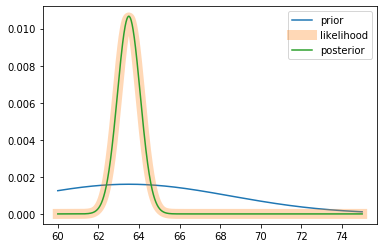

In [27]:
pp_mom = scipy.stats.norm.pdf(p, loc=male.mother.mean(), scale=5)
pp_mom = pp_mom / pp_mom.sum() # normalize

like_mom = comp_like(p, male.mother)
post_mom = posterior(pp_mom, like_mom)

plt.plot(p, pp_mom, label='prior')
plt.plot(p, like_mom, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_mom, label='posterior')
plt.legend()

To compare the posterior distributions of the mean heights of the sons to the distribution of the mean heights of the mothers, we compute and compare the confidence intervals. 

Run the code in the cell below which computes and plots the confidence intervals for the mean heights of the sons. 

The 0.950 credible interval is 68.168 to 70.225


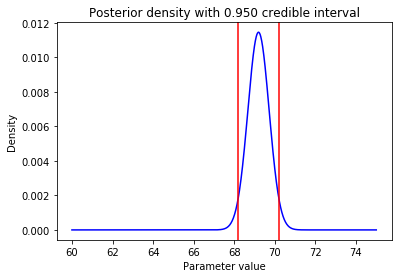

In [28]:
num_samples = 100000

plot_ci(p, post_son, num_samples, lower_q=.025, upper_q=.975)

Next, compute and plot the posterior distribution and CIs of the mean of the heights of the mothers.  

The 0.950 credible interval is 62.402 to 64.610


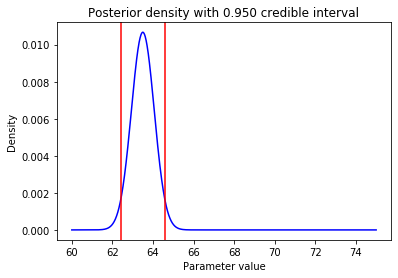

In [29]:
plot_ci(p, post_mom, num_samples, lower_q=.025, upper_q=.975)

Examine the CIs for these posterior distributions. Are the distributions of the mean heights of sons and mothers significantly different?  

***
**Your turn:** Try the variations on the foregoing Bayesian analysis.

1. The foregoing Bayesian analysis was performed with just 25 data points. Rerun this analysis with with 250 data points. How do the posterior distributions computed with the 250 data points compare to those computed with 25 data points? 
2. Perform the same analysis, except comparing the distributions of heights of sons and heights of fathers. 

**Important!:** Use another variable name for the likelihood and posterior for this exercise. 
***

### Simulation from the posterior distribution

Once we have a posterior distribution for parameters we can simulate from this distribution. The simulation consists of taking a number of random draws from the posterior parameter distribution and computing the posterior distribution of the data values. 

There are a number of reasons why you might want to simulate from the posterior distribution of data values.

- Test the model against the data.
- Compute forecasts of the dependent (label) variable from the model.

The code in the cell below computes the posterior distribution of the heights of sons. This is done by computing the distribution of height based on realizations of the parameter (the mean) from the posterior distribution. The density distribution of the simulated heights is plotted along with the histogram of the original data. Execute this code and examine the results.

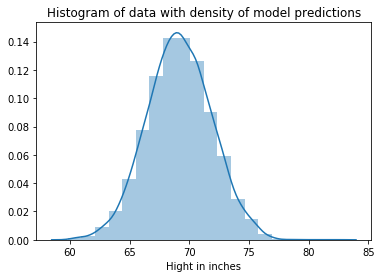

In [30]:
def sim_height(n, sigma, p, post):
    # create the probability-weighted random sample of values of the mean height
    mu = numpy.random.choice(p, size=n, replace=True, p=post)
    return scipy.stats.norm.rvs(loc=mu, scale=sigma, size=n)

def plot_dist(n, post, dat):
    seaborn.distplot(post, bins=20)
    plt.title('Histogram of data with density of model predictions')
    plt.xlabel('Hight in inches')

sim_vals = sim_height(10000, sigma=2.616329, p=p, post=post_son)
plot_dist(10000, sim_vals, male.childHeight)

Examine this chart. How well does the density of the posterior value distribution match the histogram of the original data values? Does the density of the posterior value distribtion deviate from Normal? 

***
**Your turn:** Use the model you computed with 250 data values to create a plot like the one above. Examine these results and compare them to the results obtained with the model created with only 25 data values. Which posterior density function appears to represent the data better and why? Does the density deviate from Normal?
***

## Summary

In this lesson, you have explored the following concepts:

1. Application of Bayes Theorem.
2. Computation of marginal distribtuions.
3. Selection and computation of prior distributions.
4. Selection and computation of likelihoods.
5. Computation of posterior distributions.
6. Computation and comparison of credible intervals. 
7. Simulation of data values from posterior distribution of model parameters.

<img src="img/BayesDeNeon.jpg" alt="Drawing" style="width:400px; height:300px"/>

#### Copyright 2017, 2018, 2019, 2020, Stephen F Elston. All rights reserved.